In [1]:
import httpx
from config.config import settings as env
TARGET_SYMBOLS = ["META","TSLA"]
URL = "https://api.stockdata.org/v1/data/quote"
response = httpx.get(URL, params={"symbols": "TSLA", "api_token": env.STOCK_DATA})
data = response.json()
# symbols_string = ",".join(TARGET_SYMBOLS)

# raw_data_list = response.json().get('data', [])
# data["data"][0]["day_change"]

In [ ]:
from datetime import date, datetime


r = datetime.now().date()
print(r)

2025-12-06 00:02:24.654420


In [2]:
data["data"]

[{'ticker': 'TSLA',
  'name': 'Tesla Inc',
  'exchange_short': None,
  'exchange_long': None,
  'mic_code': 'IEXG',
  'currency': 'USD',
  'price': 430.12,
  'day_high': 432.85,
  'day_low': 426.25,
  'day_open': 426.92,
  '52_week_high': None,
  '52_week_low': None,
  'market_cap': None,
  'previous_close_price': 426.52,
  'previous_close_price_time': '2025-11-26T15:59:58.000000',
  'day_change': 0.84,
  'volume': 676202,
  'is_extended_hours_price': False,
  'last_trade_time': '2025-11-28T12:59:59.000000'}]

In [75]:
processed_data = {}
for item in data["data"]:
    name = item["name"]
    ticker = item["ticker"]
    currency = item["currency"]
    day_change = item["day_change"]
    price = item["price"]
    # print(f"{name} - {ticker} - {currency} - {day_change}% - {price}")
    processed_data[ticker] = {
        "name": name,
        "currency": currency,
        "day_change": day_change,
        "price": price
    }

processed_data

    


{'TSLA': {'name': 'Tesla Inc',
  'currency': 'USD',
  'day_change': 0.84,
  'price': 430.12},
 'META': {'name': 'Meta Platforms Inc',
  'currency': 'USD',
  'day_change': 2.19,
  'price': 647.94}}

In [18]:
import httpx
from config.config import settings as env
def run_etl_data_show(ticker):
    URL = "https://api.stockdata.org/v1/data/quote"
    response = httpx.get(URL, params={"symbols": ticker, "api_token": env.STOCK_DATA})
    data = response.json()

    processed_data = {}

    for item in data["data"]:
        name = item["name"]
        ticker = item["ticker"]
        currency = item["currency"]
        day_change = item["day_change"]
        price = item["price"]

        processed_data[ticker] = {
            "name": name,
            "currency": currency,
            "day_change": f"{day_change}%",
            "price": price
        }
        
    return processed_data

run_etl_data_show("TSLA")

{'TSLA': {'name': 'Tesla Inc',
  'currency': 'USD',
  'day_change': '0.84%',
  'price': 430.12}}

In [ ]:
import time
from google import genai
from google.genai import types
from config.config import settings
from dotenv import load_dotenv
import os
load_dotenv()

client = genai.Client(api_key=os.getenv("GOOGLE_API_KEY"))

prompt ="""

"""

operation = client.models.generate_videos(
    model="veo-3.1-generate-preview",
    prompt=prompt,
    config = types.GenerateVideosConfig(
        number_of_videos=1,
        resolution="720p",
        aspect_ratio="16:9"
    ),
)

# Poll the operation status until the video is ready.
while not operation.done:
    print("Waiting for video generation to complete...")
    time.sleep(10)
    operation = client.operations.get(operation)

# Download the generated video.
generated_video = operation.response.generated_videos[0]
client.files.download(file=generated_video.video)
generated_video.video.save("dialogue_example.mp4")
print("Generated video saved to dialogue_example.mp4")


Waiting for video generation to complete...
Waiting for video generation to complete...
Waiting for video generation to complete...
Waiting for video generation to complete...
Waiting for video generation to complete...
Waiting for video generation to complete...
Generated video saved to dialogue_example.mp4


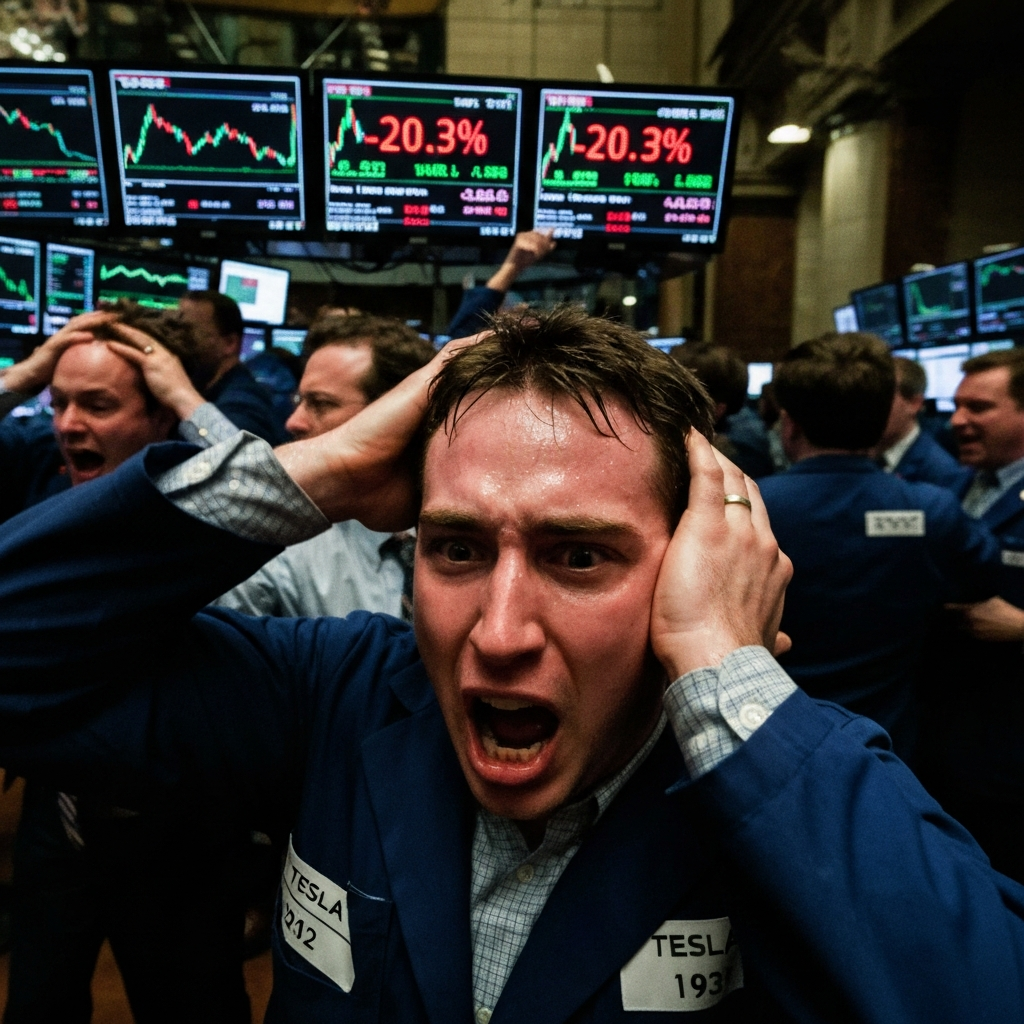

In [1]:
from google import genai
from google.genai import types


client = genai.Client()

prompt = "Tesla crash day. The Wall Street trading floor is in utter panic. People are seen on the floor with faces of terror and desperation, yelling and holding their heads. Monitors show a -20.3% drop in Tesla stock value, bright red and blinking. The atmosphere is chaotic and frenetic. The camera zooms in on the face of a young, sweaty trader who looks like he has lost everything. Documentary film style, with grain and high energy."

response = client.models.generate_images(
    model='imagen-4.0-fast-generate-001',
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images= 1,
    )
)
for generated_image in response.generated_images:
  generated_image.image.show()


In [5]:
import io
import time
from google import genai
from PIL import Image 
from google.genai import types

client = genai.Client()



prompt = """
A cinematic, wide-angle action shot of two distinct human characters engaged in intense combat atop a gigantic, spinning, metallic Bitcoin coin.

CHARACTER A: A strong, imposing man with short, rough brown hair and wearing a futuristic, dark grey trench coat. He is wielding a glowing, neon blue sword. His expression is furious and determined.

CHARACTER B: A nimble woman with long, braided black hair, wearing sharp, tailored business attire (a power suit). She is attacking Character A using complex digital energy whips emanating from her hands. Her expression is focused and calculating.

ACTION: Character A is standing defensively on the edge of the Bitcoin coin, leaning back from Character B's digital attack. The ground (the Bitcoin surface) beneath them is cracking and emitting golden light.

SETTING: The battle takes place high above a sprawling, chaotic cyberpunk metropolis at night. The sky is dark, lit only by neon signs and digital data streams swirling in the background.

STYLE: Ultra-detailed, volumetric lighting, digital art, Unreal Engine, dynamic motion blur, high contrast, cinematic composition.
"""

rob_image = types.Image.from_file(location = 'rob.jpeg') 
matt_image = types.Image.from_file(location = 'matt.jpeg') 



rob_imagex = types.VideoGenerationReferenceImage(
  image=rob_image, 
  reference_type="character"
)

matt_imagex = types.VideoGenerationReferenceImage(
  image=matt_image, 
  reference_type="character"
)

operation = client.models.generate_videos(
    model="veo-3.1-generate-preview",
    prompt=prompt,
    config=types.GenerateVideosConfig(
      reference_images=[rob_imagex, matt_imagex],
    ),
)


while not operation.done:
    print("Waiting for video generation to complete...")
    time.sleep(10)
    operation = client.operations.get(operation)


video = operation.response.generated_videos[0]
client.files.download(file=video.video)
video.video.save("veo3.1_with_reference_images.mp4")
print("Generated video saved to veo3.1_with_reference_images.mp4")


Waiting for video generation to complete...
Waiting for video generation to complete...
Waiting for video generation to complete...
Waiting for video generation to complete...
Waiting for video generation to complete...
Generated video saved to veo3.1_with_reference_images.mp4
